<a href="https://colab.research.google.com/github/lyloc-logtech/ai-code/blob/main/nhandienbantay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/drive-download-20250414T061518Z-001/palm train'
img_width, img_height = 128,128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_width, img_height),batch_size=batch_size,class_mode='categorical')

model = Sequential([Conv2D(32, (3,3), activation='relu', input_shape = (img_width, img_height, 3)),MaxPooling2D((2,2)),Conv2D(64, (3,3), activation='relu'),MaxPooling2D((2,2)),Conv2D(128, (3,3), activation='relu'),MaxPooling2D((2,2)),Flatten(),Dense(256, activation='relu'),Dense(128, activation='relu'),Dense(5, activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=50)
model.save('ban_tay.keras')

Found 200 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 73s 10s/step - accuracy: 0.2091 - loss: 1.6299
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.3355 - loss: 1.5018
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.4334 - loss: 1.4276
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4465 - loss: 1.3600
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4816 - loss: 1.1084
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5510 - loss: 1.0432
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6210 - loss: 0.8567
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6586 - loss: 1.0509
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5964 - loss: 0.9892
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7130 - loss: 0.7442
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7643 - loss: 0.7444
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7464 - loss: 0.6429
Epoch 13/50


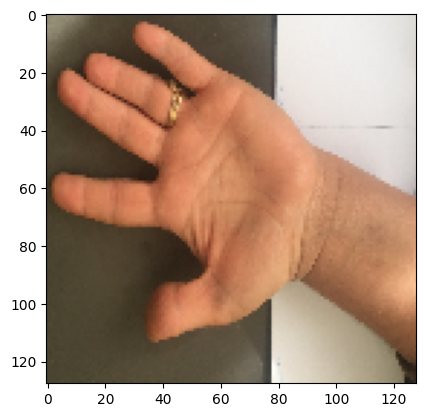

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
{'bàn_tay_của:nguoi 1'}


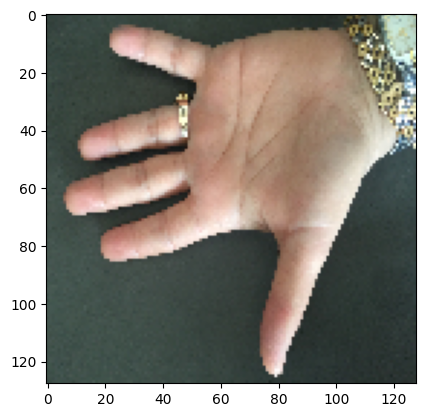

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
{'bàn_tay_của:nguoi 2'}


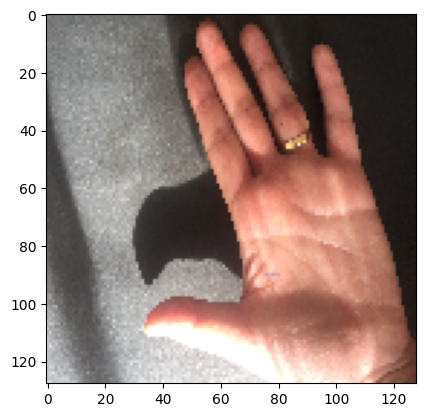

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
{'bàn_tay_của:nguoi 3'}


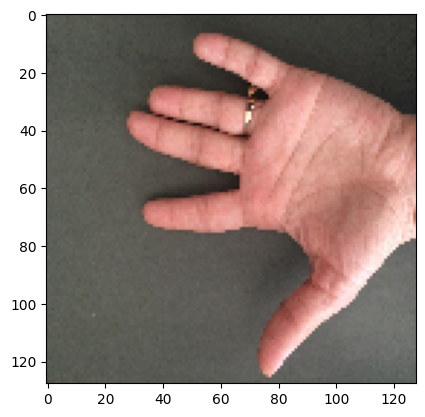

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
{'bàn_tay_của:nguoi 4'}


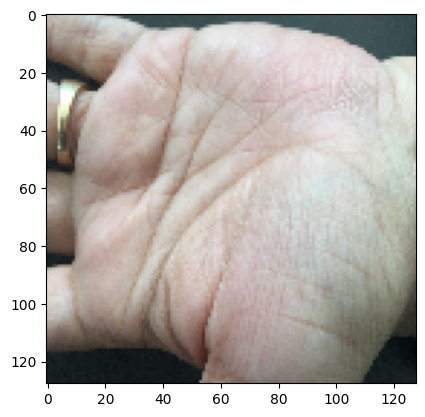

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
{'bàn_tay_của:nguoi 5'}


In [4]:
from keras.utils import load_img
import numpy as np
paths= ('/content/drive/MyDrive/drive-download-20250414T061518Z-001/palm train/nguoi 1/002_F_L_30.JPG',
        '/content/drive/MyDrive/drive-download-20250414T061518Z-001/palm train/nguoi 2/003_F_L_30.JPG',
        '/content/drive/MyDrive/drive-download-20250414T061518Z-001/palm train/nguoi 3/004_F_L_30.JPG',
        '/content/drive/MyDrive/drive-download-20250414T061518Z-001/palm train/nguoi 4/005_F_L_30.JPG',
        '/content/drive/MyDrive/drive-download-20250414T061518Z-001/palm train/nguoi 5/040_F_L_30.JPG')
for image_path in paths:
  img = load_img(image_path, target_size=(128,128))
  plt.imshow(img)
  plt.show()
  img_array= np.array(img)
  img_array= img_array.reshape((1,128,128,3))
  prediction= np.argmax(model.predict(img_array))
  class_labels={v:k for k,v in train_generator.class_indices.items()}
  food_name= class_labels[prediction]
  print({f'bàn_tay_của:{food_name}'})